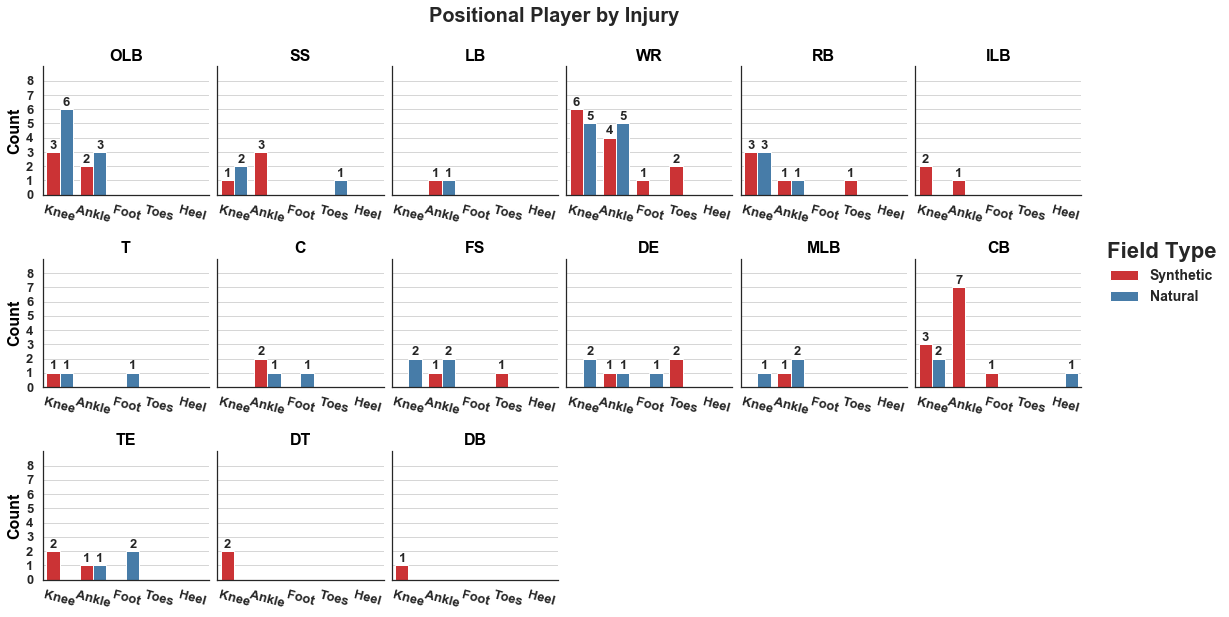

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# see more columns and rows
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# read in data
InjuryRecord = pd.read_csv('injuries.csv')

# set seaborn figure aesthetics
sns.set(style="white")
# set font tick size
fontticksize=13
# set dictionary for labeling x, y, and title
font = {'color':  'black',
        'weight': 'bold',
        'size': 16}

# use seaborn catplot function to show counts of categorical data

cat_plot=sns.catplot(x='BodyPart',hue='FieldType', col='Position', data=InjuryRecord, palette='Set1', height=2.5, aspect=1,
                     col_wrap=6, kind='count',sharey=True,sharex=False,legend=False, legend_out=False)


# create list of position names that will be used for individual titles 
position_names = InjuryRecord['Position'].unique()

# call each plot from the sns.catplot function
for i, ax in enumerate(cat_plot.axes):
    
    ax.set_title(position_names[i],fontdict=font) # set title    
    ax.set_ylim(0,9) # set y limits
    ax.set_yticks(np.arange(0,9,1)) # set number of y ticks
    ax.set_xlabel('') # set x label
    
    # call the tick labels of the x and y axes
    for tick in ax.xaxis.get_ticklabels():
        tick.set(rotation=-15) # set tick rotation
        tick.set_fontsize(fontticksize) # set tick font size
        tick.set_fontweight('bold') # set tick font weight
    for tick in ax.yaxis.get_ticklabels():
        tick.set_fontsize(fontticksize)
        tick.set(rotation=0)
        tick.set_fontweight('bold')
    
    # put labels on top of bar that represents the count.  Adjust x-axis and height here (follow the arrows)
    #                                                              |                  |
    for p in ax.patches: #                                         V                  V
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+.25),fontsize=fontticksize, fontweight='bold')
        
    # set the major y axis grid to specific linewidth
    ax.grid(b=True,which='major',axis='y', linewidth=.8)
    # bring the bars to be in front of the gridlines for better visibility
    ax.set_axisbelow(True)

    
# changing aesthetics of the overall figure now.

cat_plot.set_ylabels('Count',fontdict=font)
# assign the overall cat_plot figure 
fig=cat_plot.fig
# adjst space between the individual plots
fig.subplots_adjust(bottom=0.0, hspace=0.5, wspace=0.05)
# add a title that is centered over the figure
sup_title= fig.suptitle('Positional Player by Injury',fontsize=20,fontweight='bold')
# adjst the space between title and plot
sup_title.set_y(1.06)

# assign legend properties
legend_properties = {'weight':'bold','size':14}
# assign location of where the legend will be placed.  Change vaules to shift legend
x_shift = 0.98
y_shift = 0.45
bbox = (fig.subplotpars.left+x_shift, fig.subplotpars.top-y_shift, fig.subplotpars.right-fig.subplotpars.left,.1)
# assign legened to figureusing bbox coordinates
ax.legend(bbox_to_anchor=bbox, loc='lower left', ncol=1, borderaxespad=0., bbox_transform=fig.transFigure,
                   frameon=False,title='Field Type',prop=legend_properties)

# set font weight and font size of the legend title
ax.get_legend().get_title().set_fontweight('bold')
ax.get_legend().get_title().set_fontsize(22)


plt.savefig('position_injury.png',bbox_inches='tight',dpi=160)

plt.show()